## MODIS VCH extract and explore
This notebook is to extract percent tree cover as a raster from MOD44B.hdf files

Melanie Frost 5/31/2024

In [1]:
import pandas as pd
import numpy as np
import os
os.environ['USE_PYGEOS'] = '0'
import glob
import regex as re

import rasterio as rio
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
from osgeo import gdal, gdal_array
from osgeo.osr import SpatialReference
from rasterio.plot import show

#import random

In [6]:
modis_list = glob.glob(r'/panfs/ccds02/nobackup/people/mfrost2/temp/*MOD44B*.hdf')
modis_list.sort()
out_path = '/panfs/ccds02/nobackup/people/mfrost2/temp/'
len(modis_list)
#modis_list

['/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h11v02.006.2020098202721.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h11v02.061.2022283140421.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h11v03.006.2020098203148.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h11v03.061.2022283140555.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h12v02.006.2020098203321.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h12v02.061.2022283140451.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h12v03.006.2020098204814.hdf',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/MOD44B.A2019065.h12v03.061.2022283142117.hdf']

In [5]:
# MODIS_SINUSOIDAL_6842_PROJ_STR: str = 'PROJCS["Sinusoidal",GEOGCS["GCS_Undefined",DATUM["Undefined",SPHEROID["User_Defined_Spheroid",6371007.181,0.0]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0]]'

# MODIS_SINUSOIDAL_6842 = SpatialReference(MODIS_SINUSOIDAL_6842_PROJ_STR)

In [14]:
#Extract .hdf to .tif
measure = 'Percent_Tree_Cover' #Percent_NonTee_Vegetation, Percent_NonVegetated, Quality, Percent_Tree_Cover_SD, Percent_NonVegetated_SD, CLoud
translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-of Gtiff"))

for hdf in modis_list:
    #file = os.path.join(modis_path, hdf)
    #print(file)
    tile = (str(re.findall('0[0-9][0-9].2', hdf)[0][:4]) + str(re.findall('h[0-9][0-9]v[0-9][0-9]', hdf)[0]))
    print(tile)
    gdal.Translate(destName = f'{out_path}{tile}.tif', 
               srcDS = f'HDF4_EOS:EOS_GRID:{hdf}:MOD44B_250m_GRID:{measure}', 
               options=translateoptions#,
    )

006.h11v02
061.h11v02
006.h11v03
061.h11v03
006.h12v02
061.h12v02
006.h12v03
061.h12v03


In [ ]:
for hdf in modis_list:
    #file = os.path.join(modis_path, hdf)
    #print(file)
    tile = (str(re.findall('0[0-9][0-9].2', hdf)[0][:4]) + str(re.findall('h[0-9][0-9]v[0-9][0-9]', hdf)[0]))
    print(tile)
    ds = gdal.open(hdf)
    crs = ds.GetProjection()#[20:27]
    myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
    print("Min: ",myarray.min()," Max: ",myarray.max(), " Mean: ",myarray.mean(), " CRS: ", crs, myarray.shape)

In [18]:
tif_list = glob.glob(f'{out_path}*.tif')
tif_list

['/panfs/ccds02/nobackup/people/mfrost2/temp/006.h12v02.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/061.h12v02.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/006.h12v03.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/061.h12v03.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/BDRICM_M_250m_ll_clip_30sec.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/UiO_PEX_PERPROB_3.0_20171201_2000_2016_warp_30sec.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/006.h11v02.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/061.h11v02.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/006.h11v03.tif',
 '/panfs/ccds02/nobackup/people/mfrost2/temp/061.h11v03.tif']

/panfs/ccds02/nobackup/people/mfrost2/temp/006.h12v02.tif


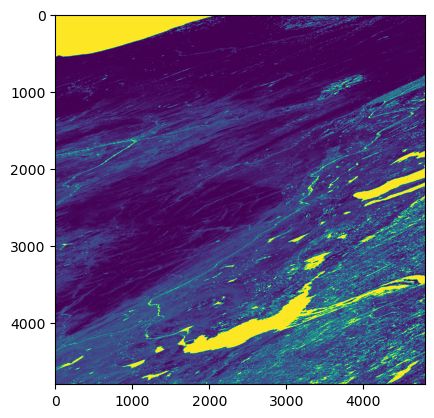

/panfs/ccds02/nobackup/people/mfrost2/temp/061.h12v02.tif


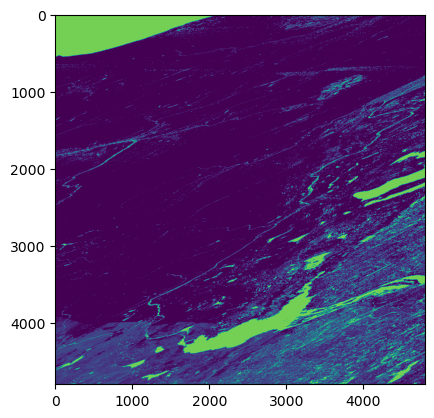

/panfs/ccds02/nobackup/people/mfrost2/temp/006.h12v03.tif


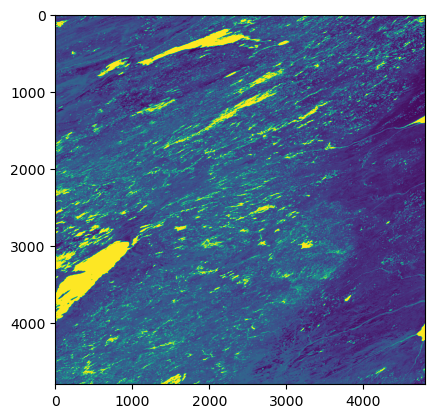

/panfs/ccds02/nobackup/people/mfrost2/temp/061.h12v03.tif


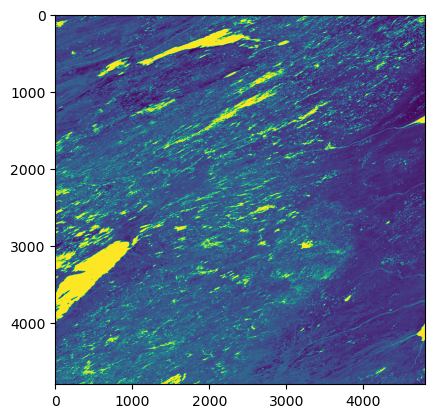

/panfs/ccds02/nobackup/people/mfrost2/temp/BDRICM_M_250m_ll_clip_30sec.tif


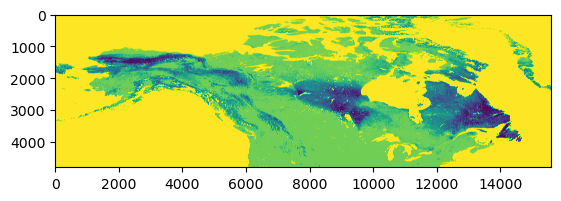

/panfs/ccds02/nobackup/people/mfrost2/temp/UiO_PEX_PERPROB_3.0_20171201_2000_2016_warp_30sec.tif


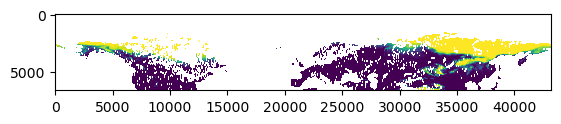

/panfs/ccds02/nobackup/people/mfrost2/temp/006.h11v02.tif


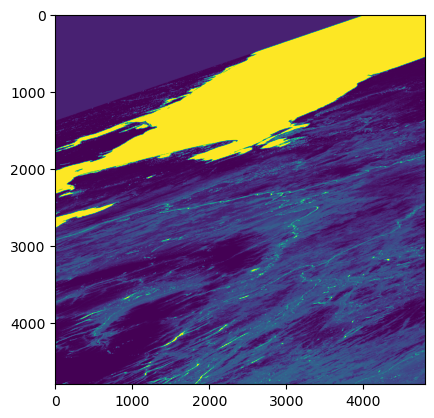

/panfs/ccds02/nobackup/people/mfrost2/temp/061.h11v02.tif


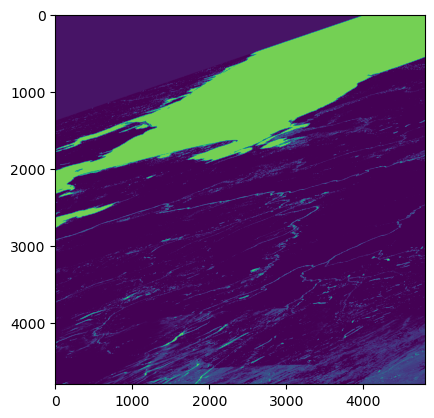

/panfs/ccds02/nobackup/people/mfrost2/temp/006.h11v03.tif


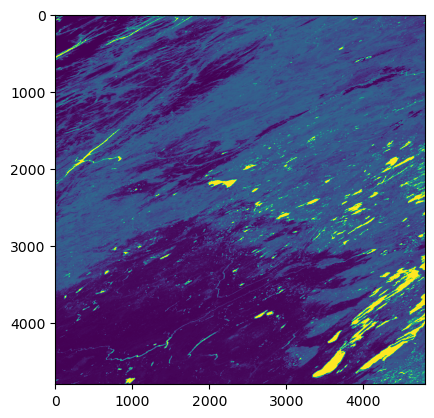

/panfs/ccds02/nobackup/people/mfrost2/temp/061.h11v03.tif


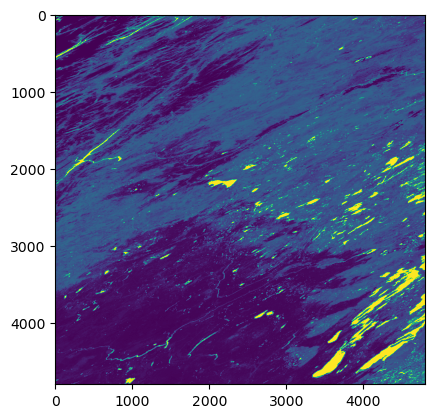

In [19]:
for tif in tif_list:
    print(tif)
    ds = gdal.Open(tif)
    array = ds.ReadAsArray()
    #plt.imshow(array)
    show(array)
    #print(ds.GetGeoTransform())
    #print(ds.GetProjection())